In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [64]:
# add starting station column

In [65]:
df = pd.read_csv('weather_trips_2022.csv', usecols=['ride_id', 'member_casual', 'DATE', 'TMIN', 'TAVG', 'TMAX','start_station_name'])

In [66]:
df.head()

,ride_id,start_station_name,member_casual,DATE,TMIN,TAVG,TMAX
0,DF208007EE5F9D79,Berkeley Pl & 6 Ave,member,2022-08-26,78,81,88
1,48A796B4996BACB0,21 St & 4 Ave,member,2022-08-03,74,82,92
2,AE459F435C0B1D5B,48 St & Barnett Ave,member,2022-08-11,74,80,91
3,CA8B4A94620E74C0,7 Ave & Central Park South,member,2022-08-10,75,81,86
4,EB85C6F0148BC348,Jerome Ave & W 195 St,member,2022-08-31,72,78,85


In [67]:
#pick a theme and set it for all plots

In [68]:
sns.set_theme(style= 'dark', palette='Blues_r')

In [69]:
#add a new column named value to the DataFrame, where every entry is 1. This column 
#serves as a placeholder for counting purposes
df['value'] = 1

In [70]:
#count the number of 1s in the value column for each group of from_station_name
df_t=df.groupby('start_station_name')['value'].count().reset_index()

In [71]:
top20 = df_t.nlargest(20, 'value')

In [72]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,131679
1718,West St & Chambers St,126290
495,Broadway & W 58 St,117797
286,6 Ave & W 33 St,109542
8,1 Ave & E 68 St,108412
461,Broadway & E 14 St,101115
485,Broadway & W 25 St,100784
1511,University Pl & E 14 St,100089
463,Broadway & E 21 St,97958
1603,W 31 St & 7 Ave,96157


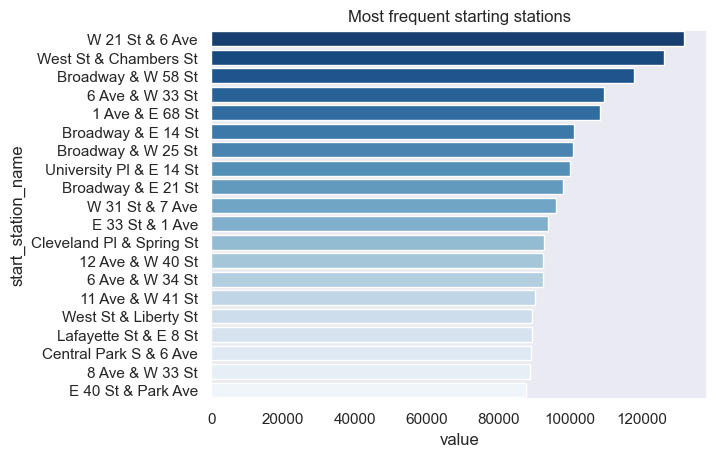

In [73]:
sns.set_palette('Blues_r' , n_colors=20)
sns.barplot(data=top20, x='value', y= 'start_station_name')
plt.title ("Most frequent starting stations")
plt.show()

In [85]:
# add count of rides per daye

In [87]:
df2 = pd.DataFrame (df.groupby (['DATE'])['ride_id'].count()).reset_index()

In [89]:
df2.rename(columns={'ride_id' : 'count_of_rides_daily'}, inplace=True)

In [93]:
df = df.merge (df2, on = 'DATE' , how = 'outer', indicator = True)

In [95]:
df.head()

,ride_id,start_station_name,member_casual,DATE,TMIN,TAVG,TMAX,value,count_of_rides_daily,_merge
0,DF208007EE5F9D79,Berkeley Pl & 6 Ave,member,2022-08-26,78,81,88,1,111955,both
1,4BF322F1E0D74152,W 44 St & 11 Ave,member,2022-08-26,78,81,88,1,111955,both
2,301E3D811B0D5219,9 Ave & W 45 St,member,2022-08-26,78,81,88,1,111955,both
3,7D4E20D0A43FCE1F,Central Ave & Covert St,casual,2022-08-26,78,81,88,1,111955,both
4,BB560C341D35EB7D,21 St & 43 Ave,member,2022-08-26,78,81,88,1,111955,both


In [98]:
df.to_csv('weather_trips_version2.csv', index=False)

In [102]:
# change date to datetime
# use date as index

In [104]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [106]:
df.dtypes

ride_id                         object
start_station_name              object
member_casual                   object
DATE                    datetime64[ns]
TMIN                             int64
TAVG                             int64
TMAX                             int64
value                            int64
count_of_rides_daily             int64
_merge                        category
dtype: object

In [113]:
df_temp = df.set_index('DATE')

<function matplotlib.pyplot.show(close=None, block=None)>

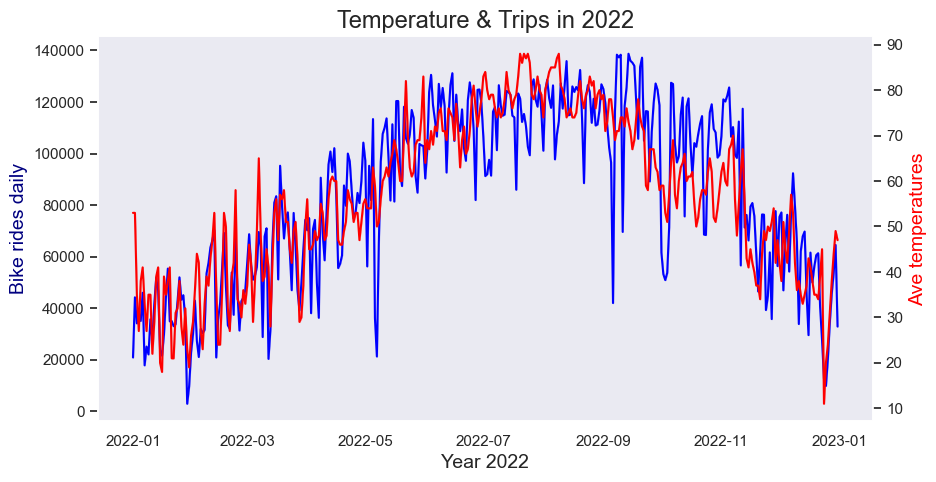

In [115]:
#create dual axis. 

fig,ax = plt.subplots (figsize=(10,5))
sns.lineplot(data=df_temp['count_of_rides_daily'], color = 'b')
ax.set_xlabel('Year 2022', fontsize = 14) # set xaxis label
ax.set_ylabel('Bike rides daily', color = 'navy', fontsize = 14) # set yaxis label

ax2 = ax.twinx()
sns.lineplot(data=df_temp['TAVG'], color = 'r', ax=ax2)
ax2.set_ylabel ('Ave temperatures', color = 'red', fontsize = 14)
plt.title ('Temperature & Trips in 2022', fontsize = 17)

plt.show

In [122]:
# Make a box plot of one of the categorical variables in your data set

In [124]:
df.dtypes

ride_id                         object
start_station_name              object
member_casual                   object
DATE                    datetime64[ns]
TMIN                             int64
TAVG                             int64
TMAX                             int64
value                            int64
count_of_rides_daily             int64
_merge                        category
dtype: object

In [128]:
df['member_casual'].unique()

array(['member', 'casual'], dtype=object)

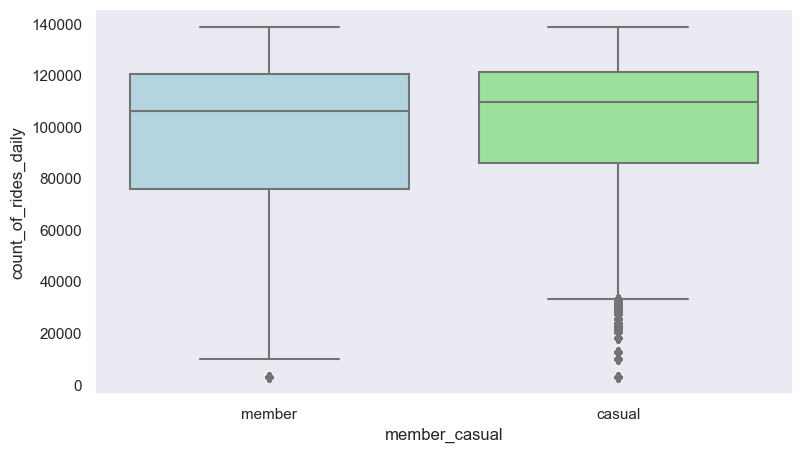

In [148]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'count_of_rides_daily', 
            data = df, palette= {'member':'lightblue', 'casual' : 'lightgreen'})
plt.show()

#### boxplot
> 'member': there is a larger spread of data for the middle 50% (IQR) and the lower quartile, as well as a lower minimum value. Lesser outliers indicate greater consistency of datapoints. this could mean that 'member's have more predictable user patterns. 

>'casual' riders have a slightly higher median and much more outliers. More outliers could mean they have a less predictable user pattern. 

In [159]:
# Facetgrids - plot to compare different cats

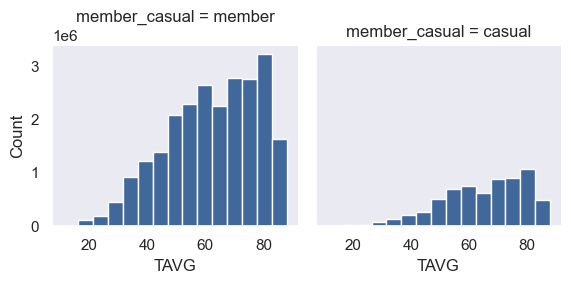

In [157]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "TAVG", bins = 15)
plt.show()

In [167]:
# Facetgrid plots count of members (member/casual) for rides across average temperatures. 

The output above shows that 'members' have a much higher ride count when compared to casual riders regardless of temperatures. As we were tasked with analyzing user behaviour and assessing bike distribution, we can use this insight to allocate more bikes at stations that are more frequently used by 'members' as compared to 'casual' users. 

We can also see that lower temperatures (and > 80) see less bike rides across both categories. Therefore, less bikes should be deployed to stations during colder months, such as winter, as well as months that see an average temperature above 80. 

More bikes should be deployed for months that see an average temperature of 50 - 80. 